## Loadig And Preprocessing the data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('employee_promotion_data.csv')  #reading the data file into our pandas data frame

In [ ]:
data.head() # retriving top 5 rcords

,Employee_ID,Age,Experience_Years,Education_Level,Training_Score,Previous_Promotions,Awards_Won,Department,Promotion_Status
0,1,50,22,2,92,2,0,IT,1
1,2,36,9,3,49,0,0,Sales,0
2,3,29,5,2,46,0,0,HR,0
3,4,42,19,1,78,0,0,Finance,1
4,5,40,15,2,42,0,0,HR,1


In [ ]:
data.info() #displaying general information about our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Employee_ID          10000 non-null  int64 
 1   Age                  10000 non-null  int64 
 2   Experience_Years     10000 non-null  int64 
 3   Education_Level      10000 non-null  int64 
 4   Training_Score       10000 non-null  int64 
 5   Previous_Promotions  10000 non-null  int64 
 6   Awards_Won           10000 non-null  int64 
 7   Department           10000 non-null  object
 8   Promotion_Status     10000 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 703.3+ KB


In [ ]:
data.describe().T  # showing basic statistics of our data

,count,mean,std,min,25%,50%,75%,max
Employee_ID,10000.0,5000.5000,2886.895680,1.0,2500.75,5000.5,7500.25,10000.0
Age,10000.0,40.5612,10.876483,22.0,31.00,41.0,50.00,59.0
Experience_Years,10000.0,15.2852,10.654371,0.0,6.00,15.0,24.00,37.0
Education_Level,10000.0,1.6694,0.729765,1.0,1.00,2.0,2.00,3.0
Training_Score,10000.0,69.6796,17.285532,40.0,55.00,69.0,85.00,99.0
Previous_Promotions,10000.0,0.1926,0.503717,0.0,0.00,0.0,0.00,2.0
Awards_Won,10000.0,0.1049,0.306440,0.0,0.00,0.0,0.00,1.0
Promotion_Status,10000.0,0.5238,0.499458,0.0,0.00,1.0,1.00,1.0


This is how our data is structured.....

Employee_ID → Unique identifier

Age → Employee's age

Experience_Years → Years of experience

Education_Level → (1=Bachelor, 2=Master, 3=PhD)

Training_Score → Performance in training (0-100)

Previous_Promotions → Number of previous promotions

Awards_Won → Whether employee won an award (0/1)

Department → HR, IT, Finance, Sales, Marketing

Promotion_Status → (0=No Promotion, 1=Promoted)

In [ ]:
data.isnull().sum()  # checking null values

,0
Employee_ID,0
Age,0
Experience_Years,0
Education_Level,0
Training_Score,0
Previous_Promotions,0
Awards_Won,0
Department,0
Promotion_Status,0


There are no null values in our data

In [ ]:
data.duplicated().sum() # checkig the dupicate values

0

## Encoding Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
cat_cols = data.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le  # Store encoder for future use


## Normalize Numerical Features

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_cols = data.select_dtypes(include=['int64', 'float64']).columns

data[num_cols] = scaler.fit_transform(data[num_cols])


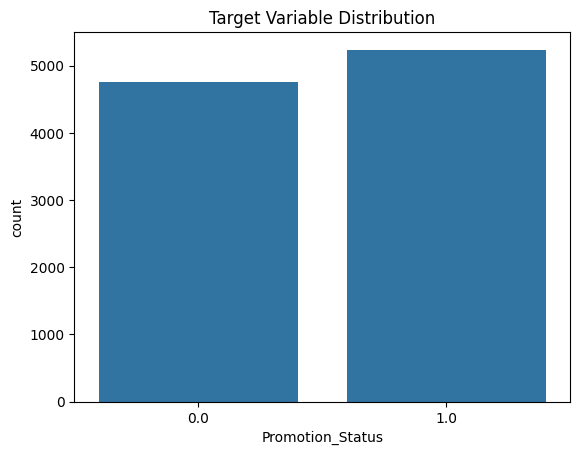

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.countplot(x=data['Promotion_Status'])
plt.title("Target Variable Distribution")
plt.show()


## Feature selection and splitting

In [ ]:
x=data.drop('Promotion_Status',axis=1)
y=data['Promotion_Status']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Verify the shape of the sets
print(f"Training data: {x_train.shape}, Testing data: {x_test.shape}")

Training data: (8000, 8), Testing data: (2000, 8)


## Model Building

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Define the DNN model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),  # First hidden layer
    Dropout(0.3),  # Dropout for regularization
    Dense(32, activation='relu'),  # Second hidden layer
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

We created a fully connected feedforward neural network with the following structure:

✔ Input Layer: Number of neurons = number of selected features

✔ Hidden Layers: 2 layers with ReLU activation (to introduce non-linearity)

✔ Output Layer: Uses Sigmoid activation for binary classification (Promotion or No Promotion)

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # compiling the model

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=32, verbose=1) #training the model

Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5438 - loss: 0.6873 - val_accuracy: 0.5725 - val_loss: 0.6723
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5872 - loss: 0.6726 - val_accuracy: 0.5840 - val_loss: 0.6678
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5999 - loss: 0.6649 - val_accuracy: 0.6000 - val_loss: 0.6654
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5919 - loss: 0.6631 - val_accuracy: 0.5930 - val_loss: 0.6648
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6049 - loss: 0.6634 - val_accuracy: 0.5935 - val_loss: 0.6657
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5913 - loss: 0.6695 - val_accuracy: 0.5910 - val_loss: 0.6666
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5909 - loss: 0.6658 - val_accuracy: 0.6000 - val_loss: 0.6648
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6007 - loss: 0.6586 - val_accuracy: 0.

## Model Evaluation

In [ ]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5949 - loss: 0.6656
Test Accuracy: 0.5900
Test Loss: 0.6658


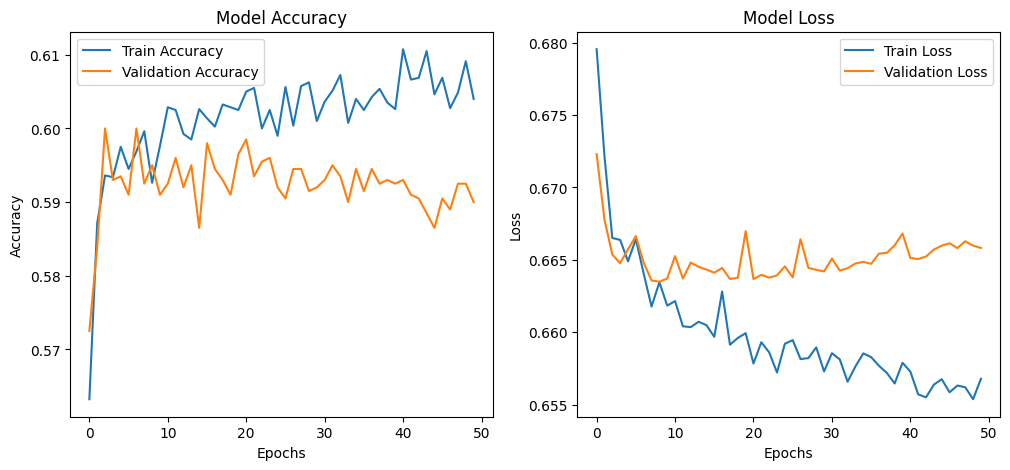

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Predictions (convert probabilities to 0 or 1)
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Print classification report
print(classification_report(y_test, y_pred))


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
              precision    recall  f1-score   support

         0.0       0.57      0.55      0.56       952
         1.0       0.61      0.62      0.62      1048

    accuracy                           0.59      2000
   macro avg       0.59      0.59      0.59      2000
weighted avg       0.59      0.59      0.59      2000



our test accuracy (59%) and test loss (0.6658) suggest that the model is not performing optimally. We need to improve it by tuning hyperparameters or modifying the architecture